1) Importer les librairies classiques : numpy, pandas, sklearn.svm, seaborn et matplolib

In [221]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from sklearn import svm

# La fonction créée ci-dessous permet de tracer le graphe des données datas regroupées par espèce. 
# Les arguments en entrées sont 
    # - datas: tableau pandas des données 
    # - colors: liste des couleurs pour regrouper sur le graphe chaque espèce.
    # - new_point: permet de tracer NEW_POINT en plus sur la courbe. S'il y a un modèle de précisé, 
    #   new_point sera d'abord identifié. Sinon il n'appartiendra à aucune espèce sur le graphe
    # - model: modèle utilisé pour identifier NEW_POINT. Si non spécifié, NEW_POINT n'est pas identifié.
    # - optional_model_info: permet de spécifier le type de modèle pour tracer la droite séparation 
    #   entre les classes pour un modèle SVM.

# new_point doit être de la forme NEW_POINT = {'x': <int>, 'y': <int>, 'color': <color>}

def plot_with_labels_as_species(datas, colors, new_point=None, model=None, optional_model_info=None):

    number_of_species = len(colors)
    labels = ['specie ' + str(i) for i in range (number_of_species)]
    
    #On trace les points regroupés par couleur en fonction de leurs espèces.
    for i in range(number_of_species):
        species  = datas[datas['species']==i]
        plt.scatter(species['petal_length'], species['petal_width'], s=50, c=colors[i], label=labels[i])
    
    #On trace le nouveau point après identification si un modèle est précisé
    if new_point != None and model != None:
        X_Y_resized = [[new_point['x'], new_point['x']]]
        specie_predicted = 'specie ' + str(model.predict(X_Y_resized)[0])
        plt.scatter(new_point['x'], new_point['y'], s=50, c=new_point['color'], label=specie_predicted)

    #On trace le nouveau point après identification sans identification.
    elif new_point != None:
        plt.scatter(new_point['x'], new_point['y'], s=50, c=new_point['color'], label='new point')

    #on trace la droite de séparation entre les classes si on précise que le type de modèle est SVM.
    if optional_model_info == 'SVM':
        w=model.coef_
        a=-w[0][0]/w[0][1]
        intercept=model.intercept_
        b=-intercept/w[0][1]
        xx = np.linspace(1,5)
        plot=plt.plot(xx,a*xx+b)
    
    plt.legend()
    plt.plot()

2) Lire le fichier < iris_SVM.csv > avec pandas

In [222]:
datas = pd.read_csv('iris_SVM.csv', sep=";")


3) Lire les trois premières lignes du fichier. Donner le nombre de lignes et de colonnes 

In [223]:
print(datas.shape)
print(datas.values[:3, :])

(100, 3)
[[1.4 0.2 0. ]
 [1.4 0.2 0. ]
 [1.3 0.2 0. ]]


4) Créer trois listes(array) petal_length,petal_width et species

In [224]:
petal_lenght, petal_width, species = datas['petal_length'], datas['petal_width'], datas['species']


5) Tracer sur la même figure les nuages de point de "petal_width" en fonction de "petal_length". Les points seront de couleurs différentes selon leur catégorie respective dans "species" 

Les 2 couleurs suivantes sont à utiliser: vert pour setosa, rouge pour versicolor. Mettre une légande sur le  graphe 

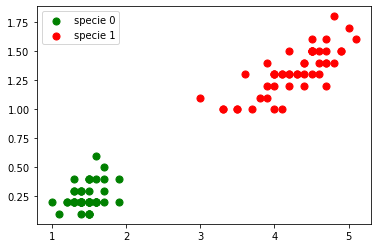

In [225]:
colors = ['green', 'red']
plot_with_labels_as_species(datas, colors)

6) Placer sur la figure précédente un point noir correspondant à un nouveau échantillon de fleur dont la pétale a les dimensions suivantes:
    largeur = 2,5 cm et longueur = 0,75 cm

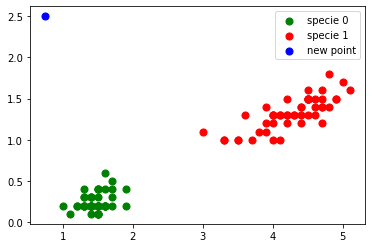

In [226]:
NEW_POINT = {'x': 0.75, 'y': 2.5, 'color': 'blue'}

colors=['green', 'red']
plot_with_labels_as_species(datas, colors, new_point=NEW_POINT)

7) Séparer les données en X_train, X_test, Y_train, Y_test (80% pour entrainement)

In [227]:
from sklearn.model_selection import train_test_split

x, y = datas[['petal_length', 'petal_width']], datas['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

8) Entrainement, test en utilisant l'algorithme SVM (SVC= pour classification,  SVR : pour regression)

In [228]:
C = 1.0
MODEL = svm.LinearSVC(C=C)
MODEL.fit(x_train, y_train)
MODEL.score(x_test, y_test)


1.0

9) Vérifier le score "from sklearn.metrics import accuracy_score"

/home/chenow/Documents/EI/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


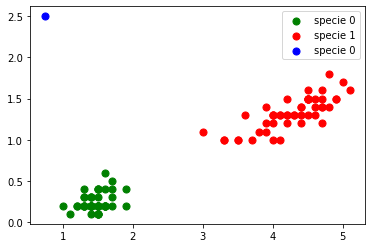

In [229]:
NEW_POINT = {'x': 0.75, 'y': 2.5, 'color': 'blue'}

y_predicted =  MODEL.predict(x)
tableau = pd.concat([x, pd.DataFrame(y_predicted, columns=['species'])], axis=1)

colors=['green', 'red']
plot_with_labels_as_species(tableau, colors, new_point=NEW_POINT, model=MODEL)

10) Tracer le plan (droite) de séparation entre les classes

/home/chenow/Documents/EI/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


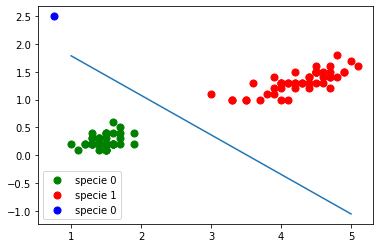

In [230]:
plot_with_labels_as_species(tableau, colors, new_point=NEW_POINT, model=MODEL, optional_model_info='SVM')